In [1]:
# !pip install iteround==1.0.2
# !pip install pairing==0.1.3
# !pip install scikit-multilearn==0.2.0
# !pip install arff==0.9
# !pip install category_encoders==2.1.0
# !pip install matplotlib==3.1.3
# !pip install tensorflow==2.1.0

In [2]:
import sys
sys.path.append("../")
from bandipy import simulation
import numpy as np
## For synthetic data generation
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [3]:
context_size_rng = np.arange(6,21)
n_actions = 20
n_samples = 20
early_frac = .70
n_users_rng = 20000
n_users_rng /= early_frac
n_users_rng = (int)(n_users_rng)
n_users = n_users_rng

In [4]:
reports = list()

##### Note: before running the follwoing code, you need to make sure that already have run the notebook `1_build_an_encoder.ipynb` for all `context_size` values that you have the `context_size_rng`. 
 For example, here you need to run the `1_build_an_encoder.ipynb`  for all `context_size` from 6 to 20.

In [5]:
for context_size in context_size_rng:
    def make_mapping_function(n_inputs, n_outputs):
            mapping_function = Sequential()
            mapping_function.add(Dense(n_outputs,input_dim=n_inputs, activation='linear'))
            # note: you can add more non-linear layers here to model nonlinear functions
            #mapping_function.add(Dense(n_outputs, activation='softmax'))
            mapping_function.compile(loss='categorical_crossentropy', optimizer="sgd")
            return mapping_function
    mapping_function = make_mapping_function(context_size,n_actions)
    mapping_function.summary()
    
    print("___________________"+str(context_size)+"_______________________________")
 
    sim = simulation.Simulation(data_type='syn', 
                            bandit_algorithm='contextual_linear_ucb',
                            privacy_model = 'crowd_blending_with_sampling', 
                            sim_sig = 'tmp')

    report = sim.run_simulation(n_users=n_users, early_frac=early_frac, n_samples=n_samples,
                               n_actions=n_actions, context_size=context_size,
                               ctr_scaling_factor=.1,
                               resp_noise_level=.01,
                               mapping_function = mapping_function,
                               alpha =1.,
                               cb_sampling_rate = .5,
                               neg_rew_sam_rate = .05,
                               cb_context_threshold = 10,
                               dec_digits = 1,
                               bin_size = 10)
    reports.append(report)
    #np.save("SysML_Synthetic_drng_"+str(n_samples)+"_"+str(n_actions)+"_"+str(context_size)+".npy", np.array(reports))
    np.save("SysML_Synthetic_drng_"+str(n_samples)+"_"+str(n_actions)+"_.npy", np.array(reports))
    print("Results",np.array(reports)) 
reports = np.array(reports)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                140       
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
___________________6_______________________________
Data Info:
Shapes: (20, 6) (20, 20)
Context_Tail: [[0.22962794 0.17515449 0.11569496 0.25203983 0.02992886 0.19755392]
 [0.1285269  0.21080099 0.07796011 0.0977538  0.30130134 0.18365686]]
Response_Tail: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Sum of Responses: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

___________________________________________________

0 - *
2 - 5 - 7 - 10 - 12 - 15 - 17 - 20 - 22 - 25 - *
27 - 30 - 32 - 35 - 37 - 40 - 42 - 45 - 47 - 50 - *
52 - 55 - 57 - 60 - 62 - 65 - 67 - 70 - 72 - 75 - *
77 - 80 - 82 - 85 - 87 - 90 - 92

In [6]:
reports = np.load("SysML_Synthetic_drng_"+str(n_samples)+"_"+str(n_actions)+"_.npy")
reports

array([[[0.00424, 0.01533],
        [0.01435, 0.0265 ],
        [0.01538, 0.02835]],

       [[0.00738, 0.02019],
        [0.01768, 0.02952],
        [0.01596, 0.02842]],

       [[0.00562, 0.01708],
        [0.01364, 0.02607],
        [0.01269, 0.02618]],

       [[0.00439, 0.0154 ],
        [0.01214, 0.02452],
        [0.01232, 0.0255 ]],

       [[0.00437, 0.0151 ],
        [0.01185, 0.02429],
        [0.01101, 0.02383]],

       [[0.00424, 0.01504],
        [0.00934, 0.02138],
        [0.00824, 0.02091]],

       [[0.00487, 0.01616],
        [0.01074, 0.02276],
        [0.00896, 0.02149]],

       [[0.00274, 0.01193],
        [0.00688, 0.01852],
        [0.00471, 0.01554]],

       [[0.00272, 0.01174],
        [0.00577, 0.01702],
        [0.00402, 0.01463]],

       [[0.00346, 0.01367],
        [0.00822, 0.02038],
        [0.00887, 0.02178]],

       [[0.00386, 0.014  ],
        [0.00775, 0.01962],
        [0.00649, 0.01826]],

       [[0.00297, 0.01259],
        [0.00597, 0.01721]

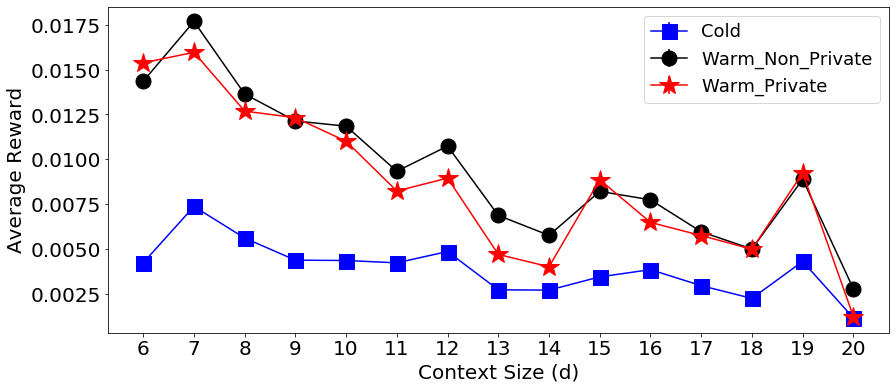

In [7]:
import matplotlib.pyplot as plt
# reports = np.load("_SysML_Synthetic_10_50_10.npy")
# reports = np.append(reports, np.load("SysML_Synthetic_10_50_10.npy")[-2:]/6, axis=0)
# users_rng = np.array([1000., 5000., 10000., 50000., 100000., 500000., 1000000.])
users_rng = np.arange(6,21)
def paint_reports(reports, users_rng):
    x_ax = users_rng
    fmts = ['bs-', 'ko-', 'r*-']
    plt.errorbar(x_ax, reports[:,0,0], reports[:,0,1]//1, fmt=fmts[0], ms=15, ecolor="blue", label="Cold")
    plt.errorbar(x_ax, reports[:,1,0], reports[:,1,1]//1, fmt=fmts[1], ms=15, ecolor="black", label="Warm_Non_Private")
    plt.errorbar(x_ax, reports[:,2,0], reports[:,2,1]//1, fmt=fmts[2], ms=20, ecolor="red", label="Warm_Private")

# users_rng = np.array([1000., 5000., 10000., 50000., 100000.])
plt.figure(figsize=(14,6))
paint_reports(reports, users_rng)
# plt.xscale('log')
plt.xlabel('Context Size (d)', size=20)
plt.ylabel('Average Reward', size=20)
plt.xticks(users_rng,size=20)
plt.yticks(size=20)
plt.legend( ncol=1, prop={'size': 18})
plt.show()